# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [19]:
# initial imports
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [20]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set the mapbox API
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [21]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [22]:
# Calculate the mean number of housing units per year (hint: use groupby) 
df_housing_units = sfo_data['housing_units'].groupby(['year']).mean()
df_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

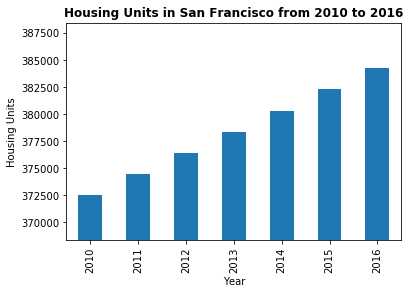

In [23]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

fig_housing_units = plt.figure()
plot_housing_units = df_housing_units.plot.bar()
plot_housing_units.set_xlabel("Year")
plot_housing_units.set_ylabel("Housing Units")
plot_housing_units.set_title(
    "Housing Units in San Francisco from 2010 to 2016", fontweight= "bold"
)


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
housing_units_std = df_housing_units.std()
housing_units_min = min(df_housing_units)
housing_units_max = max(df_housing_units)

plot_housing_units.set_ylim(
    housing_units_min - housing_units_std, housing_units_max + housing_units_std)

plt.show()
plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [24]:
# Calculate the average gross rent and average sale price per square foot
ave_price_sqft = sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()
ave_price_sqft

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


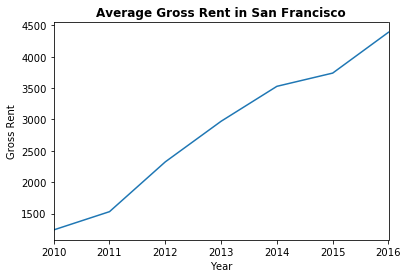

In [25]:
# Plot the Average Gross Rent per Year as a Line Chart 
df_avg_costs = (
        sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()
    )
    
fig_avg_gross_rent = plt.figure()
plot_avg_gross_rent = df_avg_costs['gross_rent'].plot()
plot_avg_gross_rent.set_xlabel("Year")
plot_avg_gross_rent.set_ylabel("Gross Rent")
plot_avg_gross_rent.set_title("Average Gross Rent in San Francisco", fontweight= "bold")

plt.show()
plt.close(fig_avg_gross_rent)

### Average Sales Price per Year

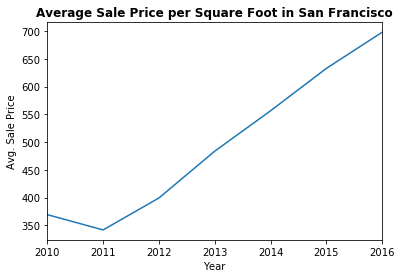

In [26]:
# Plot the Average Sales Price per Year as a line chart
df_avg_costs = (
    sfo_data[['sale_price_sqr_foot','gross_rent']]
    .groupby(sfo_data.index)
    .mean()
)
    
fig_avg_sales_price = plt.figure()
plot_avg_sales_price = df_avg_costs['sale_price_sqr_foot'].plot()
plot_avg_sales_price.set_xlabel("Year")
plot_avg_sales_price.set_ylabel("Avg. Sale Price")
plot_avg_sales_price.set_title("Average Sale Price per Square Foot in San Francisco", fontweight= "bold")

plt.show()
plt.close(fig_avg_sales_price)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [27]:
# Group by year and neighborhood and then create a new dataframe of the mean values

sf_df = sfo_data.groupby(['year','neighborhood']).mean()
df = pd.DataFrame(sf_df)
df.head(5)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [28]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
df.hvplot.line(
    x='year',
    y='sale_price_sqr_foot',
    groupby='neighborhood',
    xlabel= 'Year',
    ylabel= 'Avg. Sale Price per Square Foot'
)


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [29]:
# Getting the data from the top 10 expensive neighborhoods
top_10_expensive = df.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending = False)
top_10_expensive = top_10_expensive[['sale_price_sqr_foot','housing_units','gross_rent']].iloc[0:10]
top_10_expensive_neighborhoods = top_10_expensive.reset_index()
top_10_expensive_neighborhoods


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [30]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_expensive_neighborhoods_plt = top_10_expensive_neighborhoods.hvplot.bar(
    x='neighborhood',
    y='sale_price_sqr_foot',
    xlabel='Neighborhood',
    ylabel="Avg. Sale Pirce per Square Foot",
    label="Top 10 Expensive Neighborhoods in SFO",
    rot = 90,
    height = 400,
    width = 700
    ).opts(yformatter = "%0f")
top_10_expensive_neighborhoods_plt

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

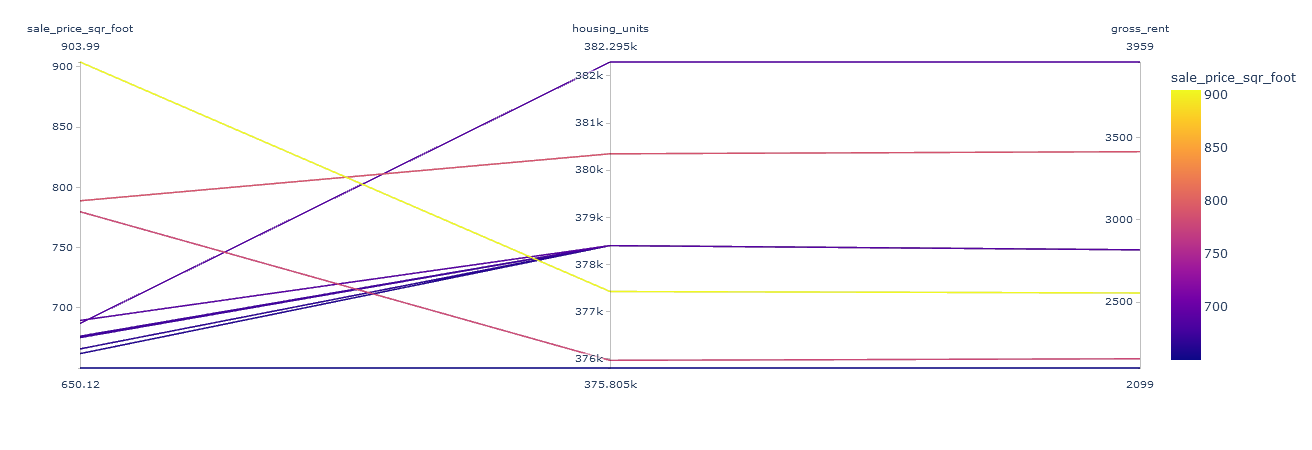

In [31]:
# Parallel Coordinates Plot'
px.parallel_coordinates(top_10_expensive_neighborhoods,color = 'sale_price_sqr_foot')

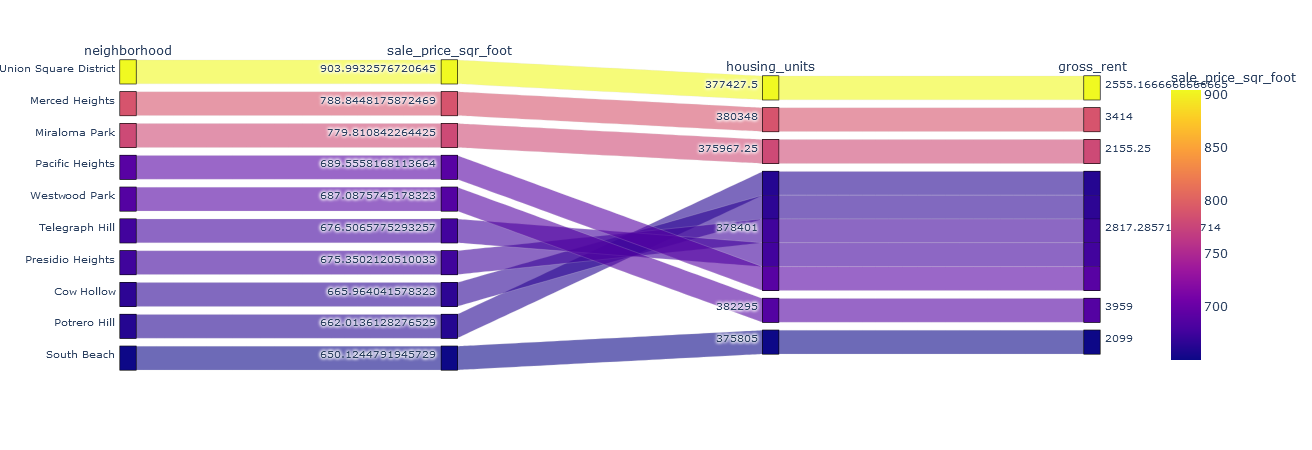

In [32]:
# Parallel Categories Plot
px.parallel_categories(top_10_expensive_neighborhoods,color = 'sale_price_sqr_foot')

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [33]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [34]:
# Calculate the mean values for each neighborhood
df = df.groupby(['neighborhood']).mean()
neighborhood_mean = df[['sale_price_sqr_foot','housing_units','gross_rent']]
neighborhood_mean.reset_index(inplace=True)
neighborhood_mean.head(5)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [35]:
# Join the average values with the neighborhood locations
neighborhood_average = pd.concat([df_neighborhood_locations,neighborhood_mean], join = 'inner', axis = 1)
neighborhood_average.drop(columns = ['neighborhood'], inplace=True)
neighborhood_average.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

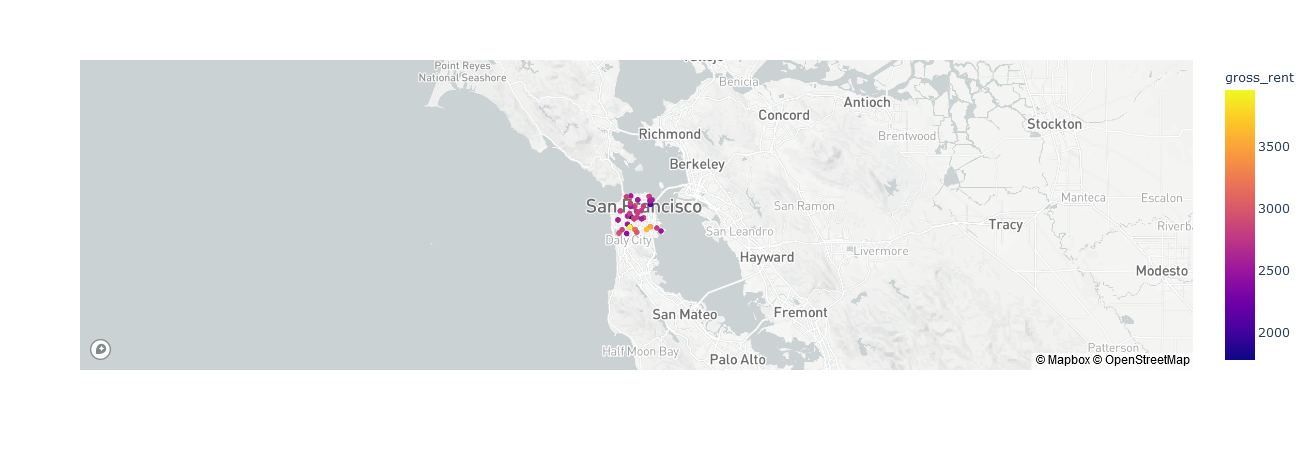

In [36]:
# Create a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
    neighborhood_average,
    lat= "Lat",
    lon= "Lon",
    color = "gross_rent"  
)
map_1.show()